Data Completeness & Data Consistency for Hospital Mortality Prediction Dataset

Data Completeness - Missing Values:
group                        0.000000
ID                           0.000000
outcome                      0.084962
age                          0.000000
gendera                      0.000000
BMI                         18.266780
hypertensive                 0.000000
atrialfibrillation           0.000000
CHD with no MI               0.000000
diabetes                     0.000000
deficiencyanemias            0.000000
depression                   0.000000
Hyperlipemia                 0.000000
Renal failure                0.000000
COPD                         0.000000
heart rate                   1.104503
Systolic blood pressure      1.359388
Diastolic blood pressure     1.359388
Respiratory rate             1.104503
temperature                  1.614274
SP O2                        1.104503
Urine output                 3.058624
hematocrit                   0.000000
RBC                          0.000000
MCH                          0.000000
MCHC          

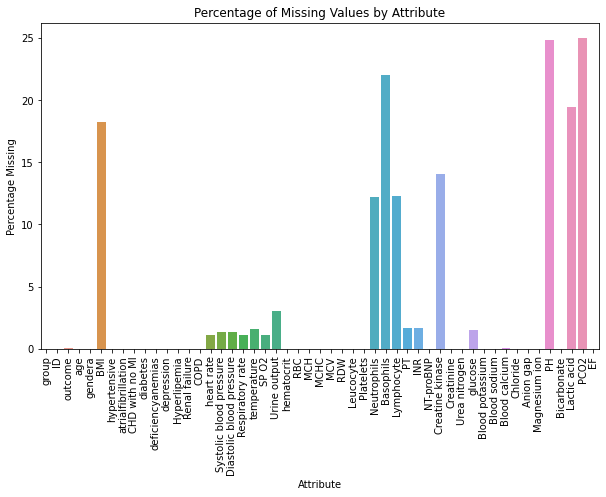

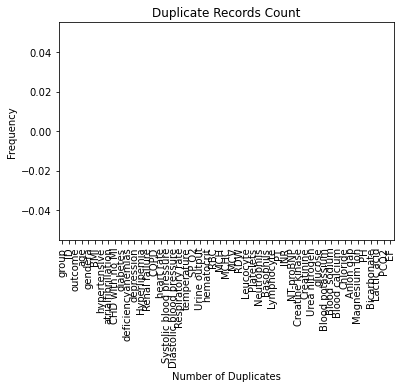

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset into a DataFrame
df = pd.read_csv('/Users/neeharbujimalla/Downloads/data01.csv')

# 1. Data Completeness - Missing Values
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("Data Completeness - Missing Values:")
print(missing_percentage)

# 2. Data Consistency - Duplicate Records
duplicates = df[df.duplicated()]
duplicate_percentage = (len(duplicates) / len(df)) * 100
print("\nData Consistency - Duplicate Records:")
print(f"Number of Duplicate Records: {len(duplicates)}")
print(f"Percentage of Duplicate Records: {duplicate_percentage}%")

# Visualize missing values using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_percentage.index, y=missing_percentage.values)
plt.xticks(rotation=90)
plt.title('Percentage of Missing Values by Attribute')
plt.xlabel('Attribute')
plt.ylabel('Percentage Missing')
plt.show()

# Visualize duplicate records
plt.figure(figsize=(6, 4))
sns.countplot(data=duplicates)
plt.xticks(rotation=90)
plt.title('Duplicate Records Count')
plt.xlabel('Number of Duplicates')
plt.ylabel('Frequency')
plt.show()

Quality Score for Hospital Mortality Prediction Dataset

In [19]:
# 1. Data Completeness - Missing Values
missing_percentage = (df.isnull().sum() / len(df)) * 100
data_completeness_score = 100 - missing_percentage.mean()

# 2. Data Consistency - Duplicate Records
duplicates = df[df.duplicated()]
duplicate_percentage = (len(duplicates) / len(df)) * 100
data_consistency_score = 100 - duplicate_percentage

# Calculate an overall quality score
quality_score = (data_completeness_score + data_consistency_score) / 2

print("Data Completeness - Missing Values:")
print(missing_percentage)
print(f"Data Completeness Score: {data_completeness_score}%")

print("\nData Consistency - Duplicate Records:")
print(f"Number of Duplicate Records: {len(duplicates)}")
print(f"Percentage of Duplicate Records: {duplicate_percentage}%")
print(f"Data Consistency Score: {data_consistency_score}%")

print(f"Overall Quality Score: {quality_score}%")

Data Completeness - Missing Values:
group                        0.000000
ID                           0.000000
outcome                      0.084962
age                          0.000000
gendera                      0.000000
BMI                         18.266780
hypertensive                 0.000000
atrialfibrillation           0.000000
CHD with no MI               0.000000
diabetes                     0.000000
deficiencyanemias            0.000000
depression                   0.000000
Hyperlipemia                 0.000000
Renal failure                0.000000
COPD                         0.000000
heart rate                   1.104503
Systolic blood pressure      1.359388
Diastolic blood pressure     1.359388
Respiratory rate             1.104503
temperature                  1.614274
SP O2                        1.104503
Urine output                 3.058624
hematocrit                   0.000000
RBC                          0.000000
MCH                          0.000000
MCHC          

Patient Demographics: for Hospital Mortality Prediction Dataset

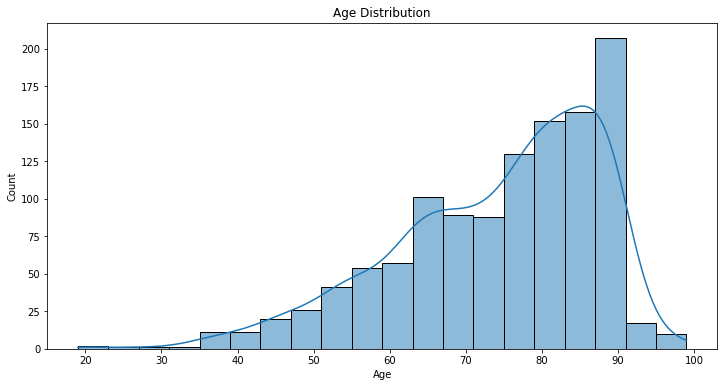

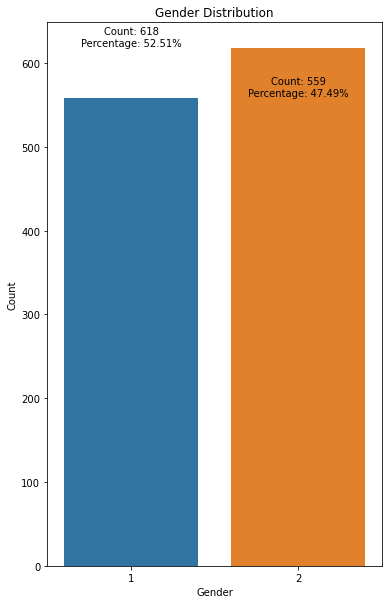

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# 1. Age Distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='age', bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

# Annotate with count and percentage
total_count = len(df)
age_counts = df['age'].count()
age_percentage = (age_counts / total_count) * 100
plt.annotate(f'Count: {age_counts}\nPercentage: {age_percentage:.2f}%', xy=(50, 300), fontsize=12, color='blue')

plt.show()

# 2. Gender Distribution
gender_counts = df['gendera'].value_counts()
plt.figure(figsize=(6, 10))
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# Annotate with count and percentage
total_count = len(df)
for i, count in enumerate(gender_counts):
    percentage = (count / total_count) * 100
    plt.text(i, count, f'Count: {count}\nPercentage: {percentage:.2f}%', ha='center', va='bottom')

plt.show()


Outliers for Hospital Mortality Prediction Dataset

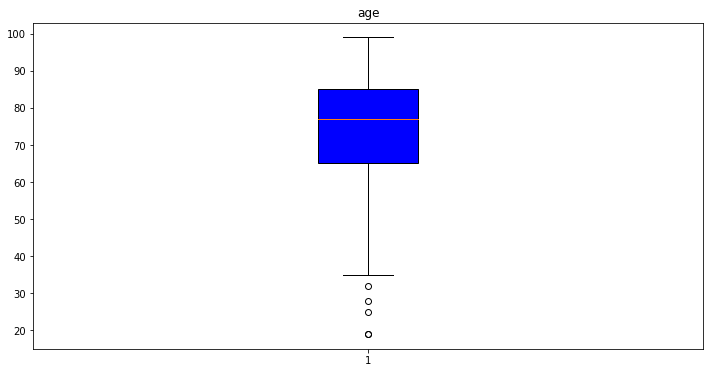

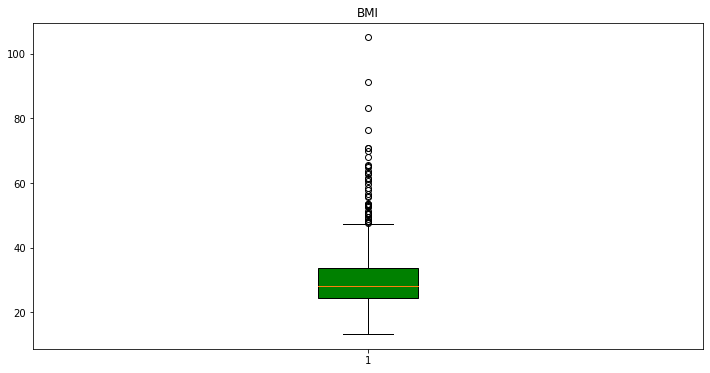

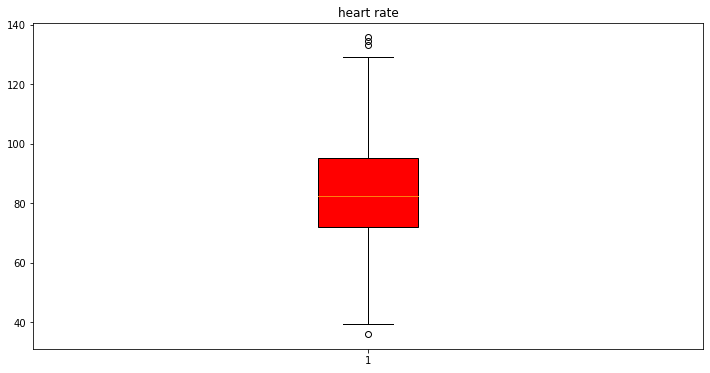

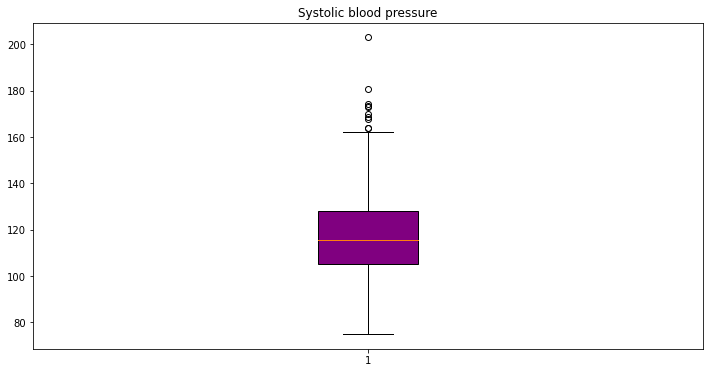

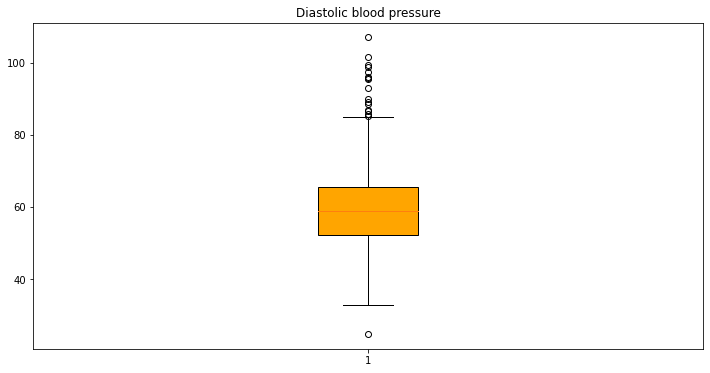

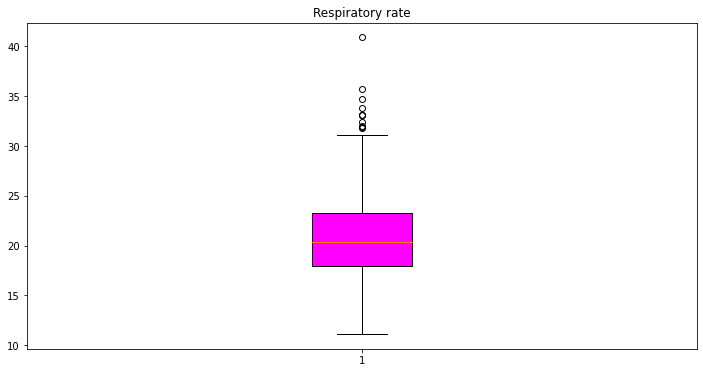

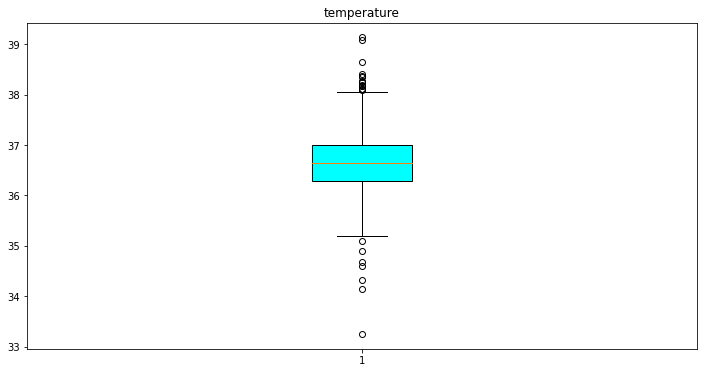

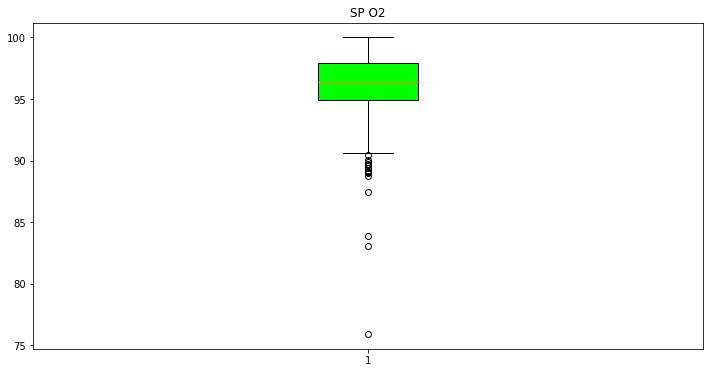

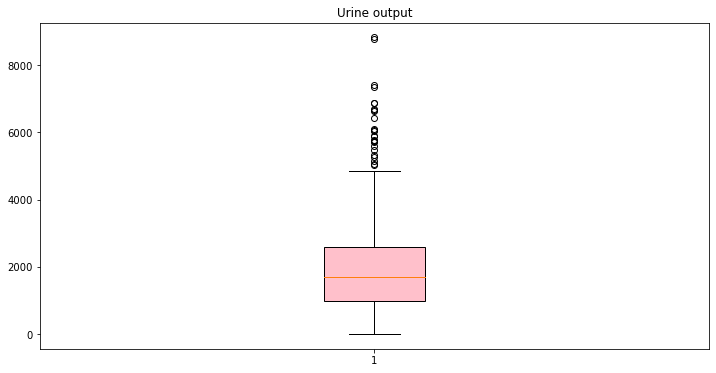

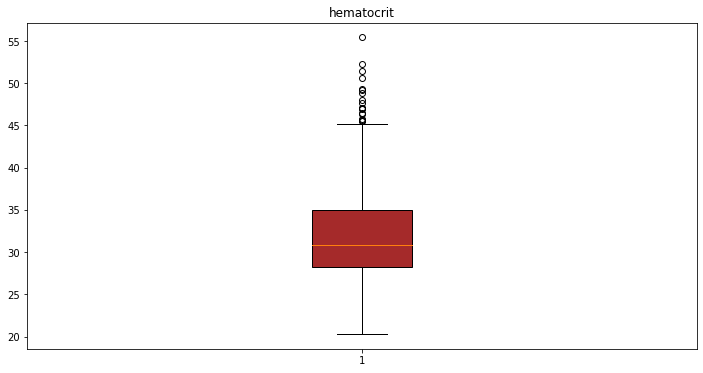

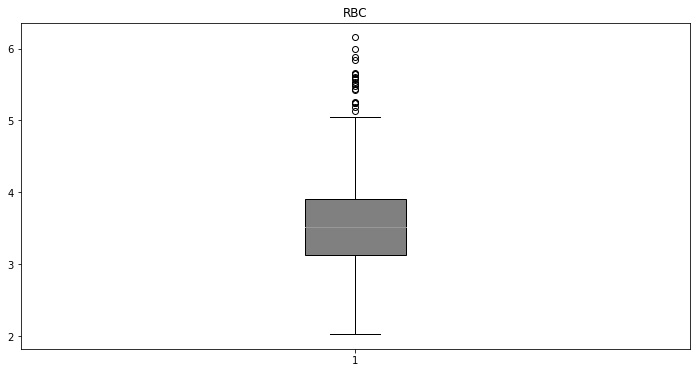

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# List of numeric columns where you want to detect outliers
numeric_columns = [
    'age','BMI','heart rate','Systolic blood pressure','Diastolic blood pressure','Respiratory rate','temperature',
    'SP O2','Urine output','hematocrit','RBC','MCH','MCHC','MCV','RDW','Platelets','Leucocyte','Neutrophils',
    'Basophils','Lymphocyte','glucose','Blood potassium','Blood sodium','Blood calcium','PCO2','EF'
]

# Define a list of colors for the box plots
colors = ['blue', 'green', 'red', 'purple', 'orange', 'magenta', 'cyan', 'lime', 'pink', 'brown', 'gray']

# Create a box plot for each numeric column with a specified color
for col, color in zip(numeric_columns, colors):
    # Check if the column contains non-numeric values and convert them to NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')

    # Check for missing values (NaNs) and handle them if necessary
    if df[col].isna().any():
        # You can choose to impute missing values here, if needed
        # For now, we'll just drop rows with missing values
        df = df.dropna(subset=[col])

    # Create the box plot with the specified color
    plt.figure(figsize=(12, 6))
    plt.boxplot(df[col], patch_artist=True, boxprops=dict(facecolor=color))
    plt.title(col)
    plt.show()


Quality Score for Outliers

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Specify the columns to analyze for outliers
columns_to_check = [
    'age','BMI','heart rate','Systolic blood pressure','Diastolic blood pressure','Respiratory rate','temperature',
    'SP O2','Urine output','hematocrit','RBC','MCH','MCHC','MCV','RDW','Platelets','Leucocyte','Neutrophils',
    'Basophils','Lymphocyte','glucose','Blood potassium','Blood sodium','Blood calcium','PCO2','EF'
]

outlier_counts = {}  # Store outlier counts for each column
total_data_points = len(df)  # Total data points in the dataset

# Loop through the specified columns
for column_name in columns_to_check:
    # Calculate the Interquartile Range (IQR)
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds to identify outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    outlier_counts[column_name] = len(outliers)

# Calculate the quality score for outlier detection
max_score = 100  # Maximum score

# Calculate the percentage of outliers for each column
outlier_percentages = [(outlier_counts[column] / total_data_points) * 100 for column in columns_to_check]

# Calculate the overall quality score as the average of outlier percentages
quality_score_outliers = max_score - sum(outlier_percentages) / len(columns_to_check)

print(f'Quality Score for Outliers: {quality_score_outliers:.2f}')


Quality Score for Outliers: 97.46


Statistics Summary for Hospital Mortality Prediction Dataset

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# List of selected numerical columns
numerical_columns = [
    'age','BMI','heart rate','Systolic blood pressure','Diastolic blood pressure','Respiratory rate','temperature',
    'SP O2','Urine output','hematocrit','RBC','MCH','MCHC','MCV','RDW','Platelets','Leucocyte','Neutrophils',
    'Basophils','Lymphocyte','glucose','Blood potassium','Blood sodium','Blood calcium','PCO2','EF'
]


# Calculate and print summary statistics for the numerical columns
summary_stats = df[numerical_columns].describe()
print("Summary Statistics:")
print(summary_stats)


Summary Statistics:
              age         BMI  heart rate  Systolic blood pressure  \
count  927.000000  927.000000  927.000000               927.000000   
mean    73.669903   30.312136   84.222252               117.587330   
std     13.609765    9.420630   16.096782                17.211638   
min     19.000000   13.346801   36.000000                75.000000   
25%     65.000000   24.330233   71.920000               105.116942   
50%     77.000000   28.405504   82.583333               115.473684   
75%     85.000000   33.817325   95.565217               128.083333   
max     99.000000  104.970366  135.708333               203.000000   

       Diastolic blood pressure  Respiratory rate  temperature       SP O2  \
count                927.000000        927.000000   927.000000  927.000000   
mean                  59.589623         20.795704    36.658495   96.229479   
std                   10.629238          4.026961     0.604596    2.309147   
min                   24.736842      

Quality Score for Statistics Summary

In [24]:
# Specify the numerical columns for which you want to calculate summary statistics
numerical_columns = [
    'age','BMI','heart rate','Systolic blood pressure','Diastolic blood pressure','Respiratory rate','temperature',
    'SP O2','Urine output','hematocrit','RBC','MCH','MCHC','MCV','RDW','Platelets','Leucocyte','Neutrophils',
    'Basophils','Lymphocyte','glucose','Blood potassium','Blood sodium','Blood calcium','PCO2','EF'
]

# Calculate summary statistics for the numerical columns
summary_stats = df[numerical_columns].describe()

# Calculate the quality score for statistical summary
max_score = 100  # Maximum score

# Calculate the range of each numerical column
column_ranges = summary_stats.loc['max'] - summary_stats.loc['min']

# Calculate the overall quality score as the average of the ranges
quality_score_stats = max_score - (column_ranges.mean() / column_ranges.max()) * max_score

print(f'Quality Score for Statistical Summary: {quality_score_stats:.2f}')

Quality Score for Statistical Summary: 95.07


QUALITY SCORE FOR THESE FEATURE EXTRACTION IN HELTHCARE DATA

/var/folders/sy/2tk40c4x6fb7qr4zv3kxtczw0000gn/T/ipykernel_10523/3085204811.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=45, ha="right")


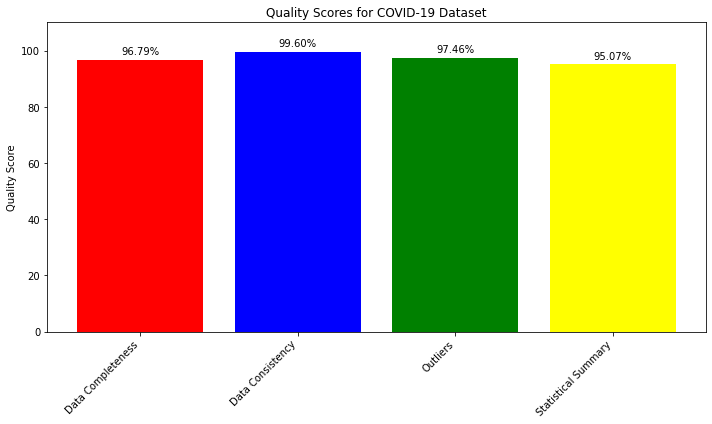

In [25]:
import matplotlib.pyplot as plt


data_completeness_scores_1 = 96.79
data_consistency_scores_1 = 99.6
outliers_scores_1 = 97.46
statistical_summary_scores_1 = 95.07



# Create a subplot for Dataset 1
fig, ax = plt.subplots(figsize=(10, 6))

# Labels and scores for Dataset 1
labels = ['Data Completeness', 'Data Consistency', 'Outliers', 'Statistical Summary']
scores = [data_completeness_scores_1, data_consistency_scores_1, outliers_scores_1,
          statistical_summary_scores_1]

# Bar colors
colors = ['red', 'blue', 'green', 'yellow']

# Annotate percentages on top of the bars
for label, score, color in zip(labels, scores, colors):
    bar = ax.bar(label, score, color=color)
    height = bar[0].get_height()
    ax.annotate(f'{score:.2f}%', xy=(bar[0].get_x() + bar[0].get_width() / 2, height), xytext=(0, 3),
                textcoords="offset points", ha='center', va='bottom', fontsize=10)

ax.set_title('Quality Scores for COVID-19 Dataset')
ax.set_ylabel('Quality Score')
ax.set_ylim(0, 110)  # Adjust the y-axis limit as needed
ax.set_xticklabels(labels, rotation=45, ha="right")
plt.tight_layout()
plt.show()